# Design of Experiement Homework 2

> $$Abstract$$
> This note is created to mark the second homework of DoE.   
> The problems are from the book "*Design of Experiments*" by Douglas C. Montgomery, with solutions completed by myself with applications of *Python*.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## 3.7

The tensile strength of Portland cement is being studied. Four different mixing techniques can be used economi
cally. A completely randomized experiment was conducted
 and the following data were collected.
$$\text{Data is shown below}$$

In [16]:
data= np.array([[int(i) for i in '3129 3000 2865 2890'.split()], 
                 [int(i) for i in '3200 3300 2975 3150'.split()],
                 [int(i) for i in '2800 2900 2985 3050'.split()],
                  [int(i) for i in ' 2600 2700 2600 2765'.split()] ])

In [17]:
data

array([[3129, 3000, 2865, 2890],
       [3200, 3300, 2975, 3150],
       [2800, 2900, 2985, 3050],
       [2600, 2700, 2600, 2765]])

In [18]:
mean_treatment = np.mean(data, axis=1)

In this data, index means **4** different **treatments**.

 >- (a)Test the hypothesis that mixing techniques affect the strength of the cement. Use 0.05.  

 >- (b)Construct a graphical display as described in Section 3.5.3 to compare the mean tensile strengths for the four mixing techniques. What are your conclusions?  

 >- (c)Use the Fisher LSD method with 0.05 to make comparisons between pairs of means.  

 >- (d)Construct a normal probability plot of the residuals. What conclusion would you draw about the validity of the normality assumption?  

 >- (e) Plot the residuals versus the predicted tensile strength. Comment on the plot.  

 >- (f) Prepare a scatter plot of the results to aid the interpretation of the results of this experiment.  


### (a)

To examine the hypothesis that mixing techniques affect the strength of the cement, we will use the **Analysis of Variance (ANOVA)** method.  
The ANOVA will help us determine if there is a significant difference in the mean tensile strengths among the four mixing techniques.  

Here we have Hypothesis:  

$
H_0: \mu_1 = \mu_2 = \mu_3 = \mu_4 \text{ vs. } H_1: \mu_i \neq \mu_j \text{ for some } i \neq j
$  
  
  Here we have some statistics to calculate:

In [19]:
SST = np.power(data - data.mean(), 2).sum()

注：此处使用**np.power()**对每一个元素作二次幂运算

In [20]:
n = 4
SSTrt = n * np.power( (data.mean(axis= 1) - data.mean()), 2).sum()

SSE = SST - SSTrt

In [21]:
SSTrt, SSE

(489740.1875, 153908.25)

Now we build $\text{F-statistic}$.

In [22]:
a = 4
N = n*a
F0 = ( SSTrt/(a-1) )/ (SSE/ (N-a))

In [23]:
F0

12.728107492613294

In the $H_0$, $F_0$ is from distribution $F(a-1, N-a)$

In [24]:
stats.f.ppf(0.99, a-1, N-a)
# alpha=0.01, 计算0.99分位数

5.952544681545868

We select $\alpha = 0.01$, in this case, $F_0.99,a-1,N-a=5.952544681545868$.   

With that $F_0>F_0.99,a-1,N-a=5.952544681545868$, we **reject** $H_0$.  

We conclude that mixing techniques **do affect** the strength of the cement.

### (b)
> Construct a graphical display as described in Section 3.5.3 to compare the mean tensile strengths for the four mixing techniques. What are your conclusions?  

To compare the mean tensile strengths for the four mixing techniques, we can use a graphical display of **T-distribution**, with $\mu=\bar{y}_{..} $ and $\theta = MSE/\sqrt{n}, MSE = SSE/(N-a)$.

In [25]:
y_mean = data.mean()
mu = y_mean
MSE = SSE / (N-a)
scale_factor = np.sqrt(MSE /n )

In [123]:
mu, scale_factor

(2931.8125, 56.625275937517515)

In [71]:
data.min(), data.max()

(2600, 3300)

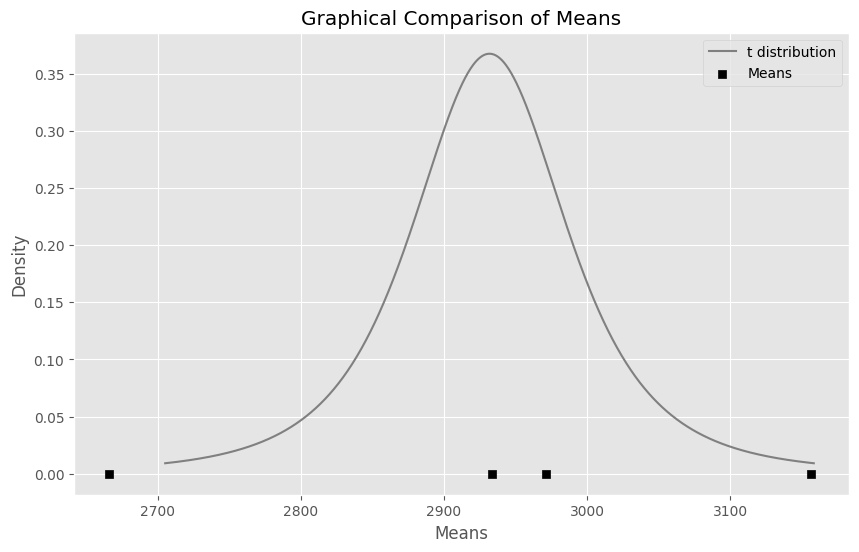

In [87]:
fig1 = plt.figure(figsize=(10, 6))
ax1 = fig1.add_subplot()

# 生成t分布的x值（这里我们使用标准t分布，自由度为n-1）
x = np.linspace(-4, 4, 1000)

# 计算t分布的y值
y = stats.t.pdf(x, df=n-1)

# 绘制t分布
plt.plot(x * scale_factor + data.mean(), y, label='t distribution', color='grey')

# 绘制处理组均值
plt.scatter(mean_treatment, np.zeros_like(mean_treatment),marker='s' , color='black', zorder=5, label='Means')



# 设置图例
plt.legend()

# 设置标题和标签
plt.title('Graphical Comparison of Means')
plt.xlabel('Means')
plt.ylabel('Density')

# 显示图形
plt.show()

According to this plot, we're almost sure they are from the same distributions.

### (c)
Use the Fisher LSD method with **0.05** to make comparisons between pairs of means.

Hypothesis Testing:
$$H_0:\mu_i = \mu_j \text{ vs } H_1:\mu_i \neq \mu_j$$

In [73]:
alpha = 0.05

In [74]:
mean_treatment = data.mean(axis=1)
mean_treatment

array([2971.  , 3156.25, 2933.75, 2666.25])

In [75]:
stats.t.ppf(alpha/2,N-a), stats.t.ppf(1-alpha/2,N-a)

(-2.178812829663418, 2.1788128296634177)

$t_{\alpha/2,N-a}=-2.178812829663418$

In [76]:
for i in range(4):
    for j in range(i+1,4):
        print(f"Comparing Mix{i+1} and Mix{j+1}:", end=',')
        
        t_stat = (mean_treatment[i] - mean_treatment[j]) / np.sqrt(MSE* 2/ n)
        print(f" t-statistic: {t_stat}", end=', ')
        if t_stat > stats.t.ppf(1-alpha/2,N-a) and t_stat < stats.t.ppf(alpha/2,N-a):
            print("Fail to reject H0")
        else:
            print('Reject H0')

Comparing Mix1 and Mix2:, t-statistic: -2.313304951650019, Reject H0
Comparing Mix1 and Mix3:, t-statistic: 0.46515848555445727, Reject H0
Comparing Mix1 and Mix4:, t-statistic: 3.8055583482609623, Reject H0
Comparing Mix2 and Mix3:, t-statistic: 2.778463437204476, Reject H0
Comparing Mix2 and Mix4:, t-statistic: 6.1188632999109815, Reject H0
Comparing Mix3 and Mix4:, t-statistic: 3.340399862706505, Reject H0


For the t-statistic is out of $((-2.178812829663418, 2.1788128296634177))$, with -2.178812829663418 is $T_{\alpha/2,N-a} $, we can **reject** $H_0$.  
Conclusion:**Every pair of means are with different means**.

### (d)
> Construct a **normal probability plot** of the residuals. What conclusion would you draw about the validity of the normality assumption?

We difine **residual** for observation $j$ in treatment $i$ as $$e_{ij} = y_{ij} - \hat{y}_{ij}$$, with $\hat{y}_{ij} = \bar{y}_{i.} ,i=1,2,...a$.

Text(0.5, 1.0, 'Normal Probability Plot of Residuals')

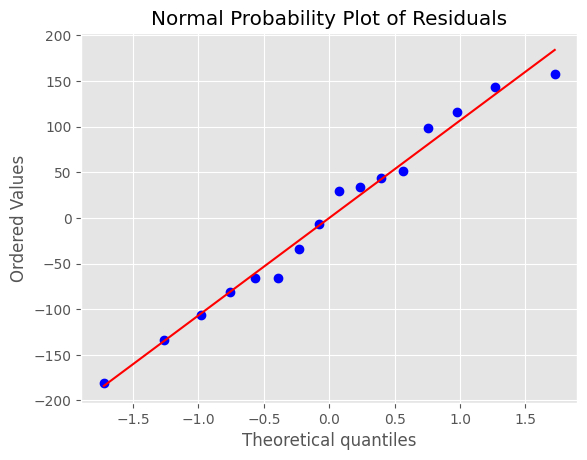

In [51]:
plt.style.use('ggplot')
list_e_i =[] # 第i组残差

for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    e_i = data[i] - mean_treatment[i]
    list_e_i.append(e_i)

residuals = np.concatenate(list_e_i)
stats.probplot(residuals, plot=plt)
plt.title('Normal Probability Plot of Residuals')

According to the plotting, we can conclude that their **normailities** are basically valid.

### (e)
> Plot the residuals versus the predicted tensile strength. Comment on the plot.  

Text(0.5, 1.0, 'Plots of residuals versus $\\hat{y}_{ij}$')

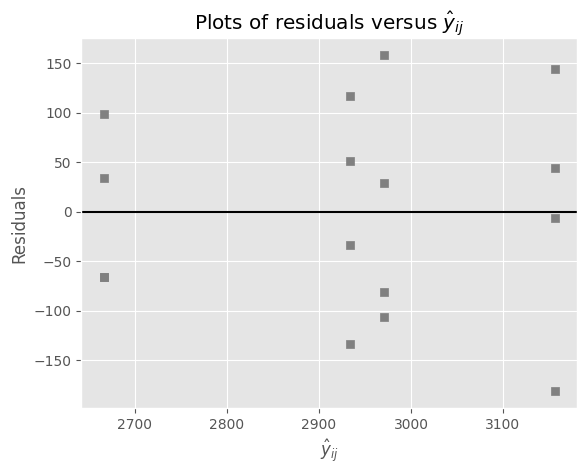

In [78]:
plt.style.use('ggplot')
plt.axhline(y=0, color='black', linestyle='-')

# plt.scatter(mean_treatment, np.zeros(4), marker='o', color='red')
for i in range(4):
    plt.scatter(mean_treatment[i] * np.ones(4), list_e_i[i], marker='s', color='grey')

plt.xlabel('$\hat{y}_{ij} $')
plt.ylabel('Residuals')
plt.title('Plots of residuals versus $\hat{y}_{ij}$')

In [79]:
mean_treatment

array([2971.  , 3156.25, 2933.75, 2666.25])

We can find an **outward-opening funnel** shape in the plot, which indicates that the **homoscedasticity** is not valid.

### (f)

> Prepare a scatter plot of the results to aid the interpretation of the results of this experiment.  

Text(0.5, 1.0, 'Scatter plot of the results')

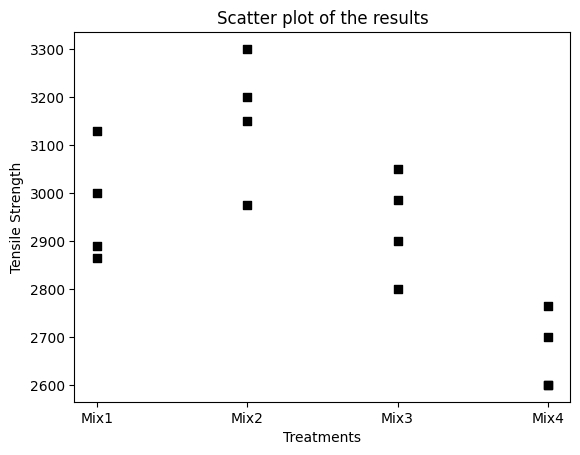

In [52]:
plt.style.use('default')

for i in range(4):
    plt.scatter(i* np.ones(4), data[i], marker='s', color='black')

plt.xlabel('Treatments')
plt.ylabel('Tensile Strength')

plt.xticks([0,1,2,3], ['Mix1', 'Mix2', 'Mix3', 'Mix4'])

plt.title('Scatter plot of the results')

Our conclusions remain.

## 3.9
> Reconsider the experiment in Problem 3.7. Find **a 95 percent confidence interval on the mean tensile strength** of the Portland cement produced by each of the four mixing techniques.<br><br>
> Also find **a 95 percent confidence interval on the difference in means for techniques 1 and 3**. Does this aid you in interpreting the results of the experiment?


Firstly we treat each group.

> 此处使用stats.ttest_1samp()函数，其返回值是一个包含t值、p值和置信区间的元组。其中，置信区间可以通过result.confidence_interval(confidence_level=0.95)来获取。

In [27]:
for i in range(4):
    result = stats.ttest_1samp(data[i], mean_treatment[i])
    confidence_interval = result.confidence_interval(confidence_level= 0.95)
    print(f"Mix{i+1}'sconfidence interval on the mean tensile strength is:\n{confidence_interval}\n")

Mix1'sconfidence interval on the mean tensile strength is:
ConfidenceInterval(low=2779.1668460355604, high=3162.8331539644396)

Mix2'sconfidence interval on the mean tensile strength is:
ConfidenceInterval(low=2939.8811925431137, high=3372.6188074568863)

Mix3'sconfidence interval on the mean tensile strength is:
ConfidenceInterval(low=2761.464420457963, high=3106.035579542037)

Mix4'sconfidence interval on the mean tensile strength is:
ConfidenceInterval(low=2537.407589317946, high=2795.092410682054)



***
Then we deal with the difference between two groups with **Contrast**.  
We're focusing on the difference between Mix1 and Mix3:
$$\mu_1 - \mu_3$$
In order to solve we create a vector $c=(1,0,-1,0)^T$  

Hypothesis testing:
$$H_0: \Sigma c_i \mu_i = 0 \text{  vs  } H_1: \Sigma c_i \mu_i \neq 0$$

In [32]:
mean_treatment

array([2971.  , 3156.25, 2933.75, 2666.25])

In [38]:
c = np.array([1,0,-1,0])

t0 = (c.T @ mean_treatment) / np.sqrt( (MSE/n)* (c.T @ c)  )

t0

0.46515848555445727

We've built our statistic $t_0= \frac{(\Sigma^{a}_{i=1} c_i \bar{y}_{i.})}{\sqrt{\frac{MSE}{n} \Sigma^a_{i=1}c_i^2}} $.  
Theorically, it's from the distribution of $T(N-a)$ if the $H_0$ is right.

In [40]:
stats.t.ppf(0.025, N-a), stats.t.ppf(0.975, N-a)

t_q = stats.t.ppf(0.025, N-a)

$t_{\alpha/2, N-a}$ is -2.178812829663418.

In [41]:
c.T @ mean_treatment- t_q* np.sqrt( (MSE/n)* (c.T @ c)  ), c.T @ mean_treatment+ t_q* np.sqrt( (MSE/n)* (c.T @ c)  )

(211.7298395072181, -137.2298395072181)

Now we know:
$$
-137.2298395072181< \Sigma^{a}_{i=1} c_i \mu_i = \mu_1 - \mu_3<211.7298395072181
$$ 
is the **95% confidence interval** on the difference between the mean tensile strength of **Mix1** and **Mix3**.

## 3.13
> A rental car company wants to investigate whether the type of car rented affects the length of the rental period. An experiment is run for one week at a particular location, and 10 rental contracts are selected at random for each car type. The results are shown in the following table
> ***
> $$\text{The Table is Shown Below}$$
> ***
> - (a) Is there evidence to support a claim that the type of car rented affects the length of the rental contract? Use 0.05. If so,which types of cars are responsible for the difference?
> 
> - (b) Analyze the residuals from this experiment and comment on model adequacy.
> 
> - (c) Notice that the response variable in this experiment is a count. Should this cause any potential concerns about the validity of the analysis of variance?

In [59]:
d1= '3 5 3 7 6 5 3 2 1 6'.split()
d2= '1 3 4 7 5 6 3 2 1 7'.split()
d3= '4 1 3 5 7 1 2 4 2 7'.split()
d4= '3 5 7 5 10 3 4 7 2 7'.split()
ds = [d1,d2,d3,d4]

for i in range(4):
    ds[i] = [int(j) for j in ds[i]]

data = np.array(ds)
data_bar = data.mean(axis=1)

data, data_bar

(array([[ 3,  5,  3,  7,  6,  5,  3,  2,  1,  6],
        [ 1,  3,  4,  7,  5,  6,  3,  2,  1,  7],
        [ 4,  1,  3,  5,  7,  1,  2,  4,  2,  7],
        [ 3,  5,  7,  5, 10,  3,  4,  7,  2,  7]]),
 array([4.1, 3.9, 3.6, 5.3]))

This is the table.$$\text{Happy Hunting}$$

### (a) 
> Is there evidence to support a claim that **the type of car rented affects the length of the rental contract**? Use **0.05**.   
> If so, which types of cars are responsible for the difference?

Hypothesis testing:
$$
H_0: \mu_1 = \mu_2 = \mu_3 = \mu_4\text{  vs  }H_1: \mu_i \neq \mu_j \text{ for some } i,j
$$

Here we use **Fisher LSD method**, with $LSD = t_{\alpha/2,N-a} \sqrt{\frac{2}{n}MSE}$

In [58]:
alpha = 0.05
LSD = stats.t.ppf(1-alpha/2, N-a) * np.sqrt(2/n) * MSE
print(f'The LSD is {LSD}')
for i in range(4):
    for j in range(i+1,4):
        C = np.abs(mean_treatment[i]- mean_treatment[j])
        statement = ['>','<'][int(C>LSD)]
        print(f'For {i+1} and {j+1}: C={C}{statement}LSD')

The LSD is 19759.938115259985
For 1 and 2: C=185.25>LSD
For 1 and 3: C=37.25>LSD
For 1 and 4: C=304.75>LSD
For 2 and 3: C=222.5>LSD
For 2 and 4: C=490.0>LSD
For 3 and 4: C=267.5>LSD


Now we reject $H_0$. There're differences of course. Concretely, they are **all different from each other**.

### (b)

> Analyze the residuals from this experiment and comment on model adequacy.

In [60]:
list_residual = []
for i in range(4):
    list_residual.append(data[i] - data_bar[i])

In [63]:
residuals = np.concatenate(list_residual)

list_residual, residuals

([array([-1.1,  0.9, -1.1,  2.9,  1.9,  0.9, -1.1, -2.1, -3.1,  1.9]),
  array([-2.9, -0.9,  0.1,  3.1,  1.1,  2.1, -0.9, -1.9, -2.9,  3.1]),
  array([ 0.4, -2.6, -0.6,  1.4,  3.4, -2.6, -1.6,  0.4, -1.6,  3.4]),
  array([-2.3, -0.3,  1.7, -0.3,  4.7, -2.3, -1.3,  1.7, -3.3,  1.7])],
 array([-1.1,  0.9, -1.1,  2.9,  1.9,  0.9, -1.1, -2.1, -3.1,  1.9, -2.9,
        -0.9,  0.1,  3.1,  1.1,  2.1, -0.9, -1.9, -2.9,  3.1,  0.4, -2.6,
        -0.6,  1.4,  3.4, -2.6, -1.6,  0.4, -1.6,  3.4, -2.3, -0.3,  1.7,
        -0.3,  4.7, -2.3, -1.3,  1.7, -3.3,  1.7]))

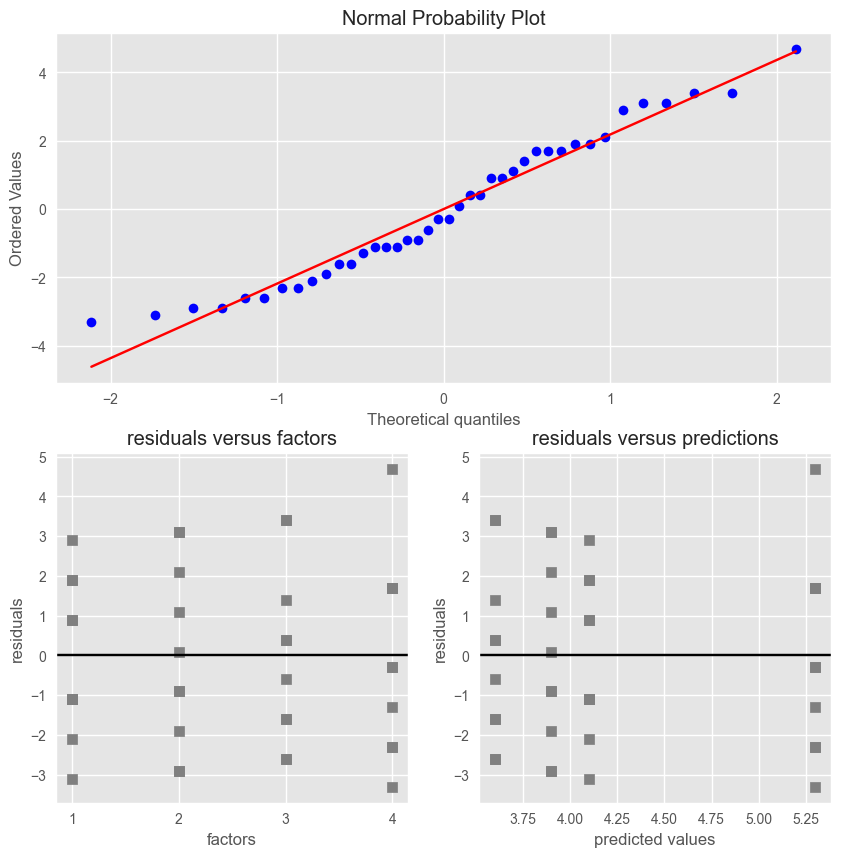

In [78]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

stats.probplot(residuals, dist="norm", plot=ax1)
ax1.set_title('Normal Probability Plot')

##################################
plt.style.use('ggplot')
for i in range(4):
    ax2.scatter((i+1)*np.ones(10), list_residual[i], marker='s', color='grey')

# ax2.axhline(0, color='black')
ax2.set_xticks([1,2,3,4])
ax2.set_title('residuals versus factors')
ax2.set_xlabel('factors')
ax2.set_ylabel('residuals')
ax2.axhline(0, color='black')
##################################

for i in range(4):
    ax3.scatter(data_bar[i]* np.ones(10), list_residual[i], marker='s', color='grey')

ax3.set_title('residuals versus predictions')
ax3.set_xlabel('predicted values')
ax3.set_ylabel('residuals')
ax3.axhline(0, color='black')

### (c)

> Notice that the response variable in this experiment is a count. Should this cause any potential concerns about the validity of the analysis of variance?

I think it may add to the variance because it's in the form of counts.

## 3.26
> Three brands of batteries are under study. It is suspected that the lives (in weeks) of the three brands are different. Five randomly selected batteries of each brand are tested with the following results:
> ***
> $$\text{Table is Shown Below}$$
> ***
> - (a) Are the lives of these brands of batteries different?
> 
> - (b) Analyze the residuals from this experiment.
> 
> - (c) Construct a 95 percent confidence interval estimate on the mean life of battery brand 2. Construct a 99 percent confidence interval estimate on the mean difference between the lives of battery brands 2 and 3.
> 
> - (d) Which brand would you select for use? If the manufacturer will replace without charge any battery that fails in less than 85 weeks,what percentage would the company expect to replace?

In [86]:
data = np.array([
[int(i) for i in '100 76 108'.split()],
 [int(i) for i in'96 80 100'.split()],
 [int(i) for i in'92 75 96'.split()],
 [int(i) for i in'96 84 98'.split()],
 [int(i) for i in'92 82 100'.split() ] ]).T

data

array([[100,  96,  92,  96,  92],
       [ 76,  80,  75,  84,  82],
       [108, 100,  96,  98, 100]])

In [87]:
averages = data.mean(axis=1)
averages

array([ 95.2,  79.4, 100.4])

In [90]:
n,a = 5,3

N = n*a

In [89]:
SST = np.power(data - data.mean(), 2) .sum()

In [92]:
SSTrt = n * np.power(averages - data.mean(),2).sum()

In [93]:
SSE = SST - SSTrt

### (a)

> Are the lives of these brands of batteries different?

Hypothesis testing:
$$
H_0: \mu_i = \mu_j \text{  vs  }H_1: \mu_i \neq \mu_j \text{ for some } i,j
$$

Here, we use LSD methods.

In [96]:
alpha = 0.01
LSD = stats.t.ppf(1-alpha/2, N-a) * np.sqrt(MSE*2/n)

for i in range(3):
    for j in range(i+1,3):
        judge = ['>','<'][int(np.abs(averages[i]-averages[j]))>LSD]
        print(f'for factors {i+1} and {j+1}: the value {judge} LSD')

for factors 1 and 2: the value > LSD
for factors 1 and 3: the value > LSD
for factors 2 and 3: the value > LSD


C:\Users\杉嶋桐惠\AppData\Local\Temp\ipykernel_17732\2409330968.py:6: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  judge = ['>','<'][int(np.abs(averages[i]-averages[j]))>LSD]


At the confident level of 99%, $\alpha=0.05$, we reject $H_0$. There're differences of course.   
Concretely, they are **all different from each other**.

### (b)
> Analyze the residuals from this experiment.

In [98]:
#处理残差

list_residual = []
for i in range(3):
    list_residual.append(data[i] - averages[i])

residuals = np.concatenate(list_residual)

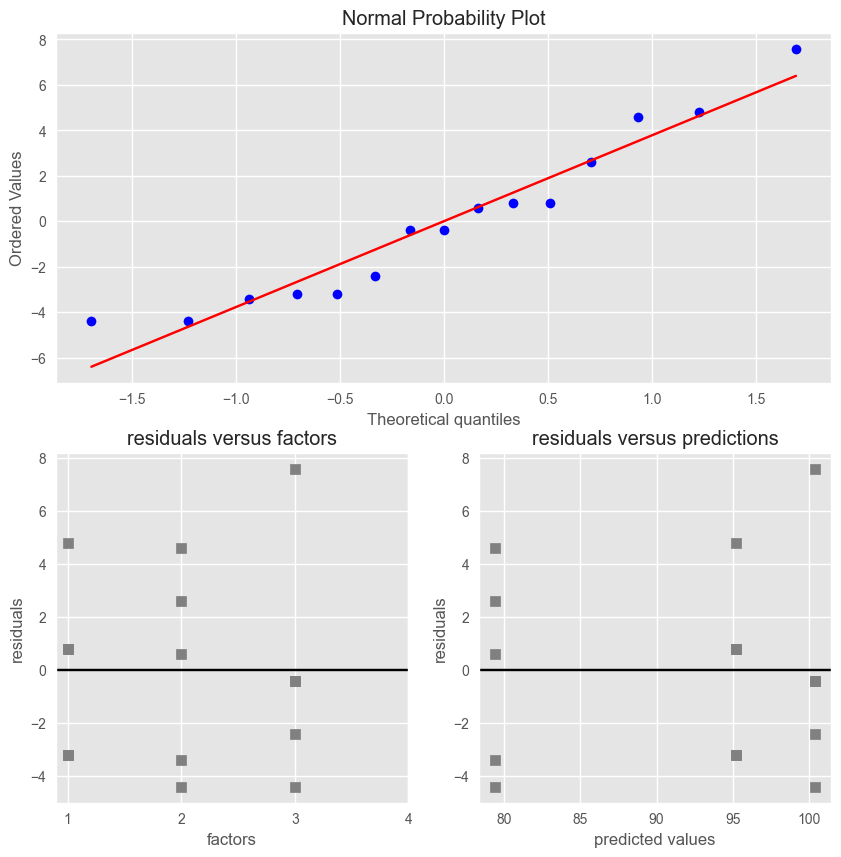

In [107]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

stats.probplot(residuals, dist="norm", plot=ax1)
ax1.set_title('Normal Probability Plot')

##################################
plt.style.use('ggplot')
for i in range(a):
    ax2.scatter((i+1)*np.ones(n), list_residual[i], marker='s', color='grey')

# ax2.axhline(0, color='black')
ax2.set_xticks([1,2,3,4])
ax2.set_title('residuals versus factors')
ax2.set_xlabel('factors')
ax2.set_ylabel('residuals')
ax2.axhline(0, color='black')
##################################

for i in range(a):
    ax3.scatter(averages[i]* np.ones(n), list_residual[i], marker='s', color='grey')

ax3.set_title('residuals versus predictions')
ax3.set_xlabel('predicted values')
ax3.set_ylabel('residuals')
ax3.axhline(0, color='black')

From the residual plot we find an outward funnel shape.  
So the **equilities of the variance of the residuals are not valid**.

### (c)

> Construct a **95 percent confidence interval** estimate on the **mean life of battery brand 2**. <br>
> Construct a **99 percent confidence interval** estimate on the **mean difference between the lives of battery brands 2 and 3**.

#### (1)

In [110]:
examination = stats.ttest_1samp(data[1], averages[1])
examination.confidence_interval(0.95)

ConfidenceInterval(low=74.62322322380004, high=84.17677677619997)

95% Confidence Interval is (74.62322322380004, 84.17677677619997)

#### (2)
We take the method of $LSD$.

In [116]:
alpha = 1-0.99
low = stats.t.ppf(alpha/2, N-a) * np.sqrt(MSE*2/n) + (averages[1] - averages[2])
high = stats.t.ppf(1-alpha/2, N-a) * np.sqrt(MSE*2/n) + (averages[1] - averages[2])

print(f'the 99% confidence interval of the difference of brand 2 and 3 is ({low}, {high})')

the 99% confidence interval of the difference of brand 2 and 3 is (-239.78426329259997, 197.78426329259997)


### (d)
> Which brand would you select for use?   
> If the manufacturer will **replace without charge any battery that fails in less than 85 weeks**, what percentage would the company expect to replace?

#### 1.

I would select the 3th for its mean life is the best. 

#### 2.

We have no reason not to use the simplest T-distribution, $T(n-1)$.

In [122]:
# 我们计划找出寿命小于85周的电池的比例
# 此时是独立情况 没有理由不使用简单T分布

value = np.sqrt(n) * (85 - averages[2]) /( np.sqrt(MSE) * np.std(data[1]))

proportion = stats.t.cdf(value, n-1)
proportion

0.46691621662702854

The proportion is 0.467.